In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#we'll need to import scipystats as st and from scipy.stats import lineregress
# Dependencies
import requests
import json

import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
#from config import gkey

In [2]:
traffic_cams = pd.read_csv("traffic_cams_final.csv", low_memory=False)

In [3]:
all_data = pd.read_csv("all_data.csv", low_memory=False)

In [4]:


traffic_cams


,Unnamed: 0,Zip Code,Issue Date,Issue Time,Location,Violation,Fine Amount,Total Paid
0,0,20020,2019/02/11 00:00:00+00,9:50:00,Bruce Pl e/b @ 15th Pl SE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0
1,1,20018,2019/02/11 00:00:00+00,9:51:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,100
2,2,20018,2019/02/11 00:00:00+00,10:03:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0
3,3,20011,2019/02/11 00:00:00+00,10:14:00,N Capitol sw/b @ Chillum NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,100
4,4,20018,2019/02/11 00:00:00+00,10:15:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0
...,...,...,...,...,...,...,...,...
1048570,1048570,20019,2019/12/13 00:00:00+00,NaN,600 blk Kenilworth Ave NE s/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,0
1048571,1048571,20020,2019/12/13 00:00:00+00,NaN,2000 blk Branch Ave SE s/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,100
1048572,1048572,20310,2019/12/13 00:00:00+00,NaN,100 blk Michigan Ave NW e/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,100
1048573,1048573,20002,2019/12/13 00:00:00+00,NaN,2800 blk New York Ave NE e/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,0


In [5]:
all_data


,Unnamed: 0,Zip Code,Issue Date,Issue Time,Location,Violation,Fine Amount,Total Paid,Population,Per Capita Income,Poverty Rate,Percent of Residents w/Bachelor's Degree or Higher,Percent Minority Population
0,0,20020,2019/02/11 00:00:00+00,9:50:00,Bruce Pl e/b @ 15th Pl SE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0,56131.0,24722.0,33.744277,12.983913,95.788424
1,1,20018,2019/02/11 00:00:00+00,9:51:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,100,19943.0,39456.0,15.088001,31.088603,87.990774
2,2,20018,2019/02/11 00:00:00+00,10:03:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0,19943.0,39456.0,15.088001,31.088603,87.990774
3,3,20011,2019/02/11 00:00:00+00,10:14:00,N Capitol sw/b @ Chillum NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,100,68695.0,40318.0,12.791324,31.862581,83.594148
4,4,20018,2019/02/11 00:00:00+00,10:15:00,Fort Lincoln Dr s/b @ 31st Pl NE,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,100,0,19943.0,39456.0,15.088001,31.088603,87.990774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,20019,2019/12/15 00:00:00+00,NaN,1400 blk Kenilworth Ave NE s/b,SPEED 16-20 MPH OVER THE SPEED LIMIT,150,0,62625.0,23072.0,27.500200,9.858683,98.297804
1048571,1048571,20037,2019/12/15 00:00:00+00,NaN,2200 blk K St NW w/b,SPEED 16-20 MPH OVER THE SPEED LIMIT,150,150,14559.0,59917.0,15.433752,47.949722,31.279621
1048572,1048572,20310,2019/12/15 00:00:00+00,NaN,100 blk Michigan Ave NW e/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,0,NaN,NaN,NaN,NaN,NaN
1048573,1048573,20019,2019/12/15 00:00:00+00,NaN,600 blk Kenilworth Ave NE s/b,SPEED 11-15 MPH OVER THE SPEED LIMIT,100,0,62625.0,23072.0,27.500200,9.858683,98.297804


In [6]:
#Aggregate Totals

totalviolations=traffic_cams['Violation'].count()
totalfines=traffic_cams['Fine Amount'].sum()
totalpaid=traffic_cams['Total Paid'].sum()
violationsbyday=totalviolations/365
finesbyday=totalfines/365
paidbyday=totalpaid/365
percentpaid=totalpaid/totalfines * 100

violationsbyminute=violationsbyday/24/60

traffic_camstotal = pd.DataFrame({'2019 Violations': [totalviolations],
                               '2019 Fines': [totalfines],
                               '2019 Revenue': [totalpaid],
                                  'Percentage Paid': [percentpaid],
                                'Average Daily Violations': [violationsbyday],
                                  'Average Daily Fines': [finesbyday],
                                  'Average Daily Revenue': [paidbyday],
                                  'Average Violations by Minute': [violationsbyminute]
                               })
traffic_camstotal["2019 Fines"] = traffic_camstotal["2019 Fines"].map("${:,.2f}".format)
traffic_camstotal["2019 Revenue"] = traffic_camstotal["2019 Revenue"].map("${:,.2f}".format)
traffic_camstotal["Average Daily Fines"] = traffic_camstotal["Average Daily Fines"].map("${:,.2f}".format)
traffic_camstotal["Average Daily Revenue"] = traffic_camstotal["Average Daily Revenue"].map("${:,.2f}".format)
traffic_camstotal["Percentage Paid"] = traffic_camstotal['Percentage Paid'].replace('%', '', 
                                                    regex=True).astype('float').round(0)
traffic_camstotal['Average Daily Violations'] = traffic_camstotal['Average Daily Violations'].round(0)
traffic_camstotal['Average Violations by Minute'] = traffic_camstotal['Average Violations by Minute'].round(0)
traffic_camstotal.index.name=None

traffic_camstotal

,2019 Violations,2019 Fines,2019 Revenue,Percentage Paid,Average Daily Violations,Average Daily Fines,Average Daily Revenue,Average Violations by Minute
0,1048575,"$143,515,050.00","$52,660,953.00",37.0,2873.0,"$393,191.92","$144,276.58",2.0


In [7]:
all_data.columns


Index(['Unnamed: 0', 'Zip Code', 'Issue Date', 'Issue Time', 'Location',
       'Violation', 'Fine Amount', 'Total Paid', 'Population',
       'Per Capita Income', 'Poverty Rate',
       'Percent of Residents w/Bachelor's Degree or Higher',
       'Percent Minority Population'],
      dtype='object')

In [8]:
zipcodeviolations = all_data.groupby('Zip Code').count()["Violation"]
zipcodefines=all_data.groupby('Zip Code').sum()['Fine Amount']

zipcodeviolations=zipcodeviolations.reset_index()
zipcodefines=zipcodefines.reset_index()


zipcode_merge=pd.merge(zipcodeviolations, zipcodefines, on = 'Zip Code')

zipcode_merge.index.name=None

zipcode_merge=zipcode_merge.rename(columns={"Violation": '2019 Violations', 'Fine Amount': '2019 Fines'})

zipcode_merge["2019 Fines"] = zipcode_merge["2019 Fines"].map("${:,.2f}".format)

zipcode_merge=zipcode_merge.sort_values('2019 Violations', ascending=False)
zipcode_merge
                                            

,Zip Code,2019 Violations,2019 Fines
16,20020,210485,"$35,763,500.00"
15,20019,118630,"$14,013,100.00"
1,20002,114190,"$12,701,900.00"
17,20032,113366,"$24,031,450.00"
18,20037,89604,"$10,540,100.00"
9,20011,71557,"$7,962,900.00"
14,20018,70580,"$7,454,250.00"
12,20016,51902,"$5,468,800.00"
0,20001,46337,"$7,247,450.00"
5,20007,36257,"$3,850,250.00"


In [9]:
#create  dataframes for scatterplottes comparing number of violations to median income, poverty rate, and minority population
zipcodeviolations = all_data.groupby('Zip Code').count()["Violation"]
zipcodefines=all_data.groupby('Zip Code').sum()['Fine Amount']
zipcodeincome=all_data.groupby('Zip Code').mean()['Per Capita Income']
zipcodeminority=all_data.groupby('Zip Code').mean()['Percent Minority Population']
zipcodepoverty=all_data.groupby('Zip Code').mean()['Poverty Rate']


zipcodeviolations=zipcodeviolations.reset_index()
zipcodeincome=zipcodeincome.reset_index()
zipcodeminority=zipcodeminority.reset_index()
zipcodepoverty=zipcodepoverty.reset_index()

incomeregress=pd.merge(zipcodeviolations, zipcodeincome, on = 'Zip Code')
incomeregress.index.name=None
incomeregress=incomeregress.dropna(how='any')

incomefines=pd.merge(zipcodefines, zipcodeincome, on = 'Zip Code')
incomefines.index.name=None
incomefines=incomefines.dropna(how='any')

minorityregress=pd.merge(zipcodeviolations, zipcodeminority, on = 'Zip Code')
minorityregress.index.name=None
minorityregress=minorityregress.dropna(how='any')

povertyregress=pd.merge(zipcodeviolations, zipcodepoverty, on = 'Zip Code')
povertyregress.index.name=None
povertyregress=povertyregress.dropna(how='any')

incomefines



,Zip Code,Fine Amount,Per Capita Income
0,20001,7247450,60678.0
1,20002,12701900,52141.0
2,20003,925700,66331.0
3,20004,398750,109468.0
4,20005,85650,78166.0
5,20007,3850250,88413.0
6,20008,482850,99315.0
7,20009,66600,77556.0
8,20010,780950,49681.0
9,20011,7962900,40318.0


The correlation between both factors is -0.6


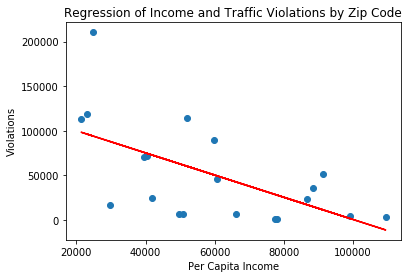

In [10]:
#scatter plot of violations and per capita income
y_values = incomeregress['Violation']
x_values = incomeregress['Per Capita Income']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Income and Traffic Violations by Zip Code')
plt.ylabel('Violations')
plt.xlabel('Per Capita Income')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The correlation between both factors is -0.6


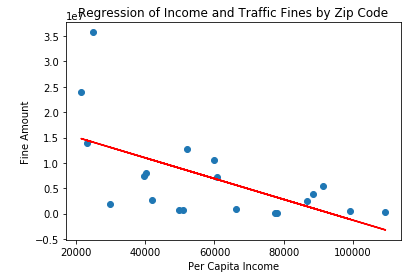

In [11]:
#scatter plot of fines and per capita income
y_values = incomefines['Fine Amount']
x_values = incomefines['Per Capita Income']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Income and Traffic Fines by Zip Code')
plt.ylabel('Fine Amount')
plt.xlabel('Per Capita Income')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The correlation between both factors is 0.52


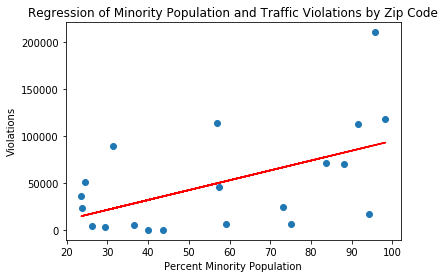

In [12]:
#scatter plot of violations and minority population
y_values = minorityregress['Violation']
x_values = minorityregress['Percent Minority Population']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Minority Population and Traffic Violations by Zip Code')
plt.ylabel('Violations')
plt.xlabel('Percent Minority Population')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The correlation between both factors is 0.85


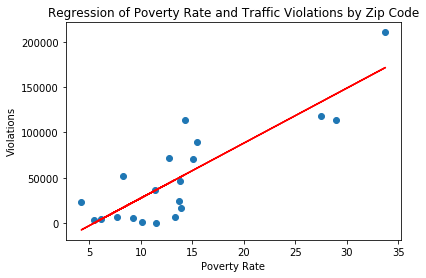

In [13]:
#scatterplot of violations and poverty rate
y_values = povertyregress['Violation']
x_values = povertyregress['Poverty Rate']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Poverty Rate and Traffic Violations by Zip Code')
plt.ylabel('Violations')
plt.xlabel('Poverty Rate')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Images/povertyscatter.png", bbox_inches='tight')

plt.show()



In [14]:
all_data.columns

Index(['Unnamed: 0', 'Zip Code', 'Issue Date', 'Issue Time', 'Location',
       'Violation', 'Fine Amount', 'Total Paid', 'Population',
       'Per Capita Income', 'Poverty Rate',
       'Percent of Residents w/Bachelor's Degree or Higher',
       'Percent Minority Population'],
      dtype='object')

In [15]:
#create dataframe for scatterplot correlating unpaid violations and poverty rate

unpaidscatter_df=all_data [['Zip Code', 'Fine Amount', 'Total Paid', 'Per Capita Income']]

unpaidamount=all_data['Fine Amount']-all_data['Total Paid']

unpaidscatter_df['Unpaid Fines'] = unpaidamount

#group data frame by zip code
unpaidscatter_df=unpaidscatter_df.groupby('Zip Code').sum()['Unpaid Fines']
unpaidscatter_df=unpaidscatter_df.reset_index()

unpaidscatter_df=pd.merge(unpaidscatter_df, zipcodepoverty, on = 'Zip Code')
unpaidscatter_df=pd.merge(unpaidscatter_df, zipcodeincome, on = 'Zip Code')
unpaidscatter_df=unpaidscatter_df.sort_values('Unpaid Fines', ascending=False)
unpaidscatter_df=unpaidscatter_df.dropna(how='any')


unpaidscatter_df



C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Zip Code,Unpaid Fines,Poverty Rate,Per Capita Income
16,20020,24731335,33.744277,24722.0
17,20032,17234905,28.979734,21379.0
15,20019,9331351,27.500200,23072.0
1,20002,7404925,14.283073,52141.0
18,20037,5319229,15.433752,59917.0
14,20018,5026840,15.088001,39456.0
9,20011,4635360,12.791324,40318.0
0,20001,4435975,13.845363,60678.0
12,20016,2309615,8.328781,91274.0
5,20007,1897777,11.370728,88413.0


The correlation between both factors is 0.91


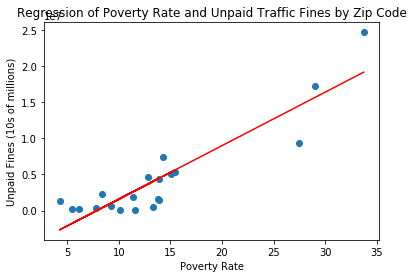

In [16]:
#scatterplot of violations and poverty rate
y_values = unpaidscatter_df['Unpaid Fines']
x_values = unpaidscatter_df['Poverty Rate']


correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Poverty Rate and Unpaid Traffic Fines by Zip Code')
plt.ylabel('Unpaid Fines (10s of millions)')
plt.xlabel('Poverty Rate')



print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("Images/unpaidfinesscatter.png", bbox_inches='tight')

plt.show()

The correlation between both factors is -0.62


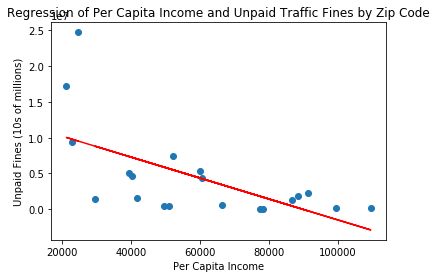

In [17]:
#scatterplot of violations and poverty rate
y_values = unpaidscatter_df['Unpaid Fines']
x_values = unpaidscatter_df['Per Capita Income']


correlation = st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression of Per Capita Income and Unpaid Traffic Fines by Zip Code')
plt.ylabel('Unpaid Fines (10s of millions)')
plt.xlabel('Per Capita Income')



print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

In [18]:


quartiles = unpaidscatter_df['Unpaid Fines'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of unpaid fines is: {lowerq}")
print(f"The upper quartile of unpaid fines is: {upperq}")
print(f"The interquartile range of unpaid fines is: {iqr}")
print(f"The the median of unpaid fines is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f'-----------------------------------------------------------------------')

quartiles = unpaidscatter_df['Poverty Rate'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of poverty rate is: {lowerq}")
print(f"The upper quartile of poverty rate is: {upperq}")
print(f"The interquartile range of poverty rate is: {iqr}")
print(f"The the median of poverty rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of unpaid fines is: 427538.75
The upper quartile of unpaid fines is: 5099937.25
The interquartile range of unpaid fines is: 4672398.5
The the median of unpaid fines is: 1763993.5 
Values below -6581059.0 could be outliers.
Values above 12108535.0 could be outliers.
-----------------------------------------------------------------------
The lower quartile of poverty rate is: 9.021611593998362
The upper quartile of poverty rate is: 14.484304694985651
The interquartile range of poverty rate is: 5.462693100987289
The the median of poverty rate is: 13.040146759993831 
Values below 0.8275719425174266 could be outliers.
Values above 22.678344346466588 could be outliers.


In [19]:
finebins = [0, 1000000, 5000000, 10000000, 30000000]

finelabels = ['< $1M', '$1M-5M', '$5M-10M', '> $10M']

unpaidscatter_df['Unpaid Fines by Zip Code']=pd.cut(unpaidscatter_df['Unpaid Fines'], finebins, labels=finelabels, include_lowest=True)

scatterbins_df=unpaidscatter_df.groupby(['Unpaid Fines by Zip Code']).mean()



scatterbins_table = scatterbins_df[['Poverty Rate', 'Per Capita Income']]

scatterbins_table["Poverty Rate"] = scatterbins_table["Poverty Rate"].map("{:,.2f}%".format)
scatterbins_table["Per Capita Income"] = scatterbins_table["Per Capita Income"].map("${:,.2f}".format)



C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
scatterbins_table

,Poverty Rate,Per Capita Income
Unpaid Fines by Zip Code,,
< $1M,9.07%,"$75,924.43"
$1M-5M,11.17%,"$62,697.86"
$5M-10M,18.08%,"$43,646.50"
> $10M,31.36%,"$23,050.50"


In [21]:
unpaidscatter_df["Unpaid Fines"] = unpaidscatter_df["Unpaid Fines"].map("${:,.2f}".format)
unpaidscatter_df["Poverty Rate"] = unpaidscatter_df["Poverty Rate"].map("{:,.2f}%".format)
unpaidscatter_df["Per Capita Income"] = unpaidscatter_df["Per Capita Income"].map("${:,.2f}".format)


unpaidscatter_df.head(3)

,Zip Code,Unpaid Fines,Poverty Rate,Per Capita Income,Unpaid Fines by Zip Code
16,20020,"$24,731,335.00",33.74%,"$24,722.00",> $10M
17,20032,"$17,234,905.00",28.98%,"$21,379.00",> $10M
15,20019,"$9,331,351.00",27.50%,"$23,072.00",$5M-10M
